<a href="https://colab.research.google.com/github/DeepFluxion/R_for_Data_Science/blob/main/3_Data_visualisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Visualização de dados
## 3.1 Introdução
> “O gráfico simples trouxe mais informações à mente do analista de dados do que qualquer outro dispositivo.” — John Tukey

Este capítulo ensinará como visualizar seus dados usando ggplot2. O R possui vários sistemas para fazer gráficos, mas o **ggplot2** é um dos mais elegantes e versáteis. O **ggplot2** implementa a gramática de gráficos , um sistema coerente para descrever e construir gráficos. Com o **ggplot2**, você pode fazer mais rápido aprendendo um sistema e aplicando-o em muitos lugares.

Se você quiser aprender mais sobre os fundamentos teóricos do ggplot2 antes de começar, eu recomendo ler [“The Layered Grammar of Graphics”](http://vita.had.co.nz/papers/layered-grammar.pdf) .m

### 3.1.1 Pré -requisitos
Este capítulo se concentra no **ggplot2**, um dos principais membros do **tidyverse**. Para acessar os conjuntos de dados, páginas de ajuda e funções que usaremos neste capítulo, carregue o **tidyverse** executando este código:

In [1]:
library(tidyverse)
library(repr)
theme_set(theme_gray(base_size = 18))
options(repr.plot.width=10, repr.plot.height=8)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Essa linha de código carrega o núcleo do tidyverse; pacotes que você usará em quase todas as análises de dados. Ele também informa quais funções do cleanverse estão em conflito com funções na base R (ou de outros pacotes que você possa ter carregado).

Se você executar este código e receber a mensagem de erro “não há pacote chamado 'tidyverse'”, você precisará primeiro instalá-lo e depois executá-lo `library()` novamente.

In [2]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Você só precisa instalar um pacote uma vez, mas precisa recarregá-lo toda vez que iniciar uma nova sessão.

Se precisarmos ser explícitos sobre a origem de uma função (ou conjunto de dados), usaremos a forma especial `package::function()`. Por exemplo, `ggplot2::ggplot()`informa explicitamente que estamos usando a função `ggplot()` do pacote `ggplot2`.

## 3.2 Primeiros passos
Vamos usar nosso primeiro gráfico para responder a uma pergunta: 
> Carros com motores grandes usam mais combustível do que carros com motores pequenos? 

Você provavelmente já tem uma resposta, mas tente torná-la precisa. 
> Qual é a relação entre o tamanho do motor e a eficiência de combustível? É positivo? Negativo? Linear? Não linear?

### 3.2.1 O dataframe `mpg`
Você pode testar sua resposta com o dataframe `mpg`m quadro de dados encontrado em **ggplot2** (também conhecido como `ggplot2::mpg`). 
> Um dataframe é uma coleção retangular de variáveis (nas colunas) e observações (nas linhas). 

O dataframe `mpg` contém observações coletadas pela Agência de Proteção Ambiental dos EUA em 38 modelos de carro.

In [3]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


Entre as variáveis de `mpg` estão:

* **displ**, tamanho do motor de um carro, em litros.

* **hwy**, a eficiência de combustível de um carro na estrada, em milhas por galão (mpg). Um carro com baixa eficiência de combustível consome mais combustível do que um carro com alta eficiência de combustível quando percorrem a mesma distância.

Para saber mais `mpg`, abra sua página de ajuda executando `?mpg`.

### 3.2.2 Criando um ggplot
Para plotar `mpg`, execute este código para colocar **displ**no eixo x e **hwy** no eixo y:

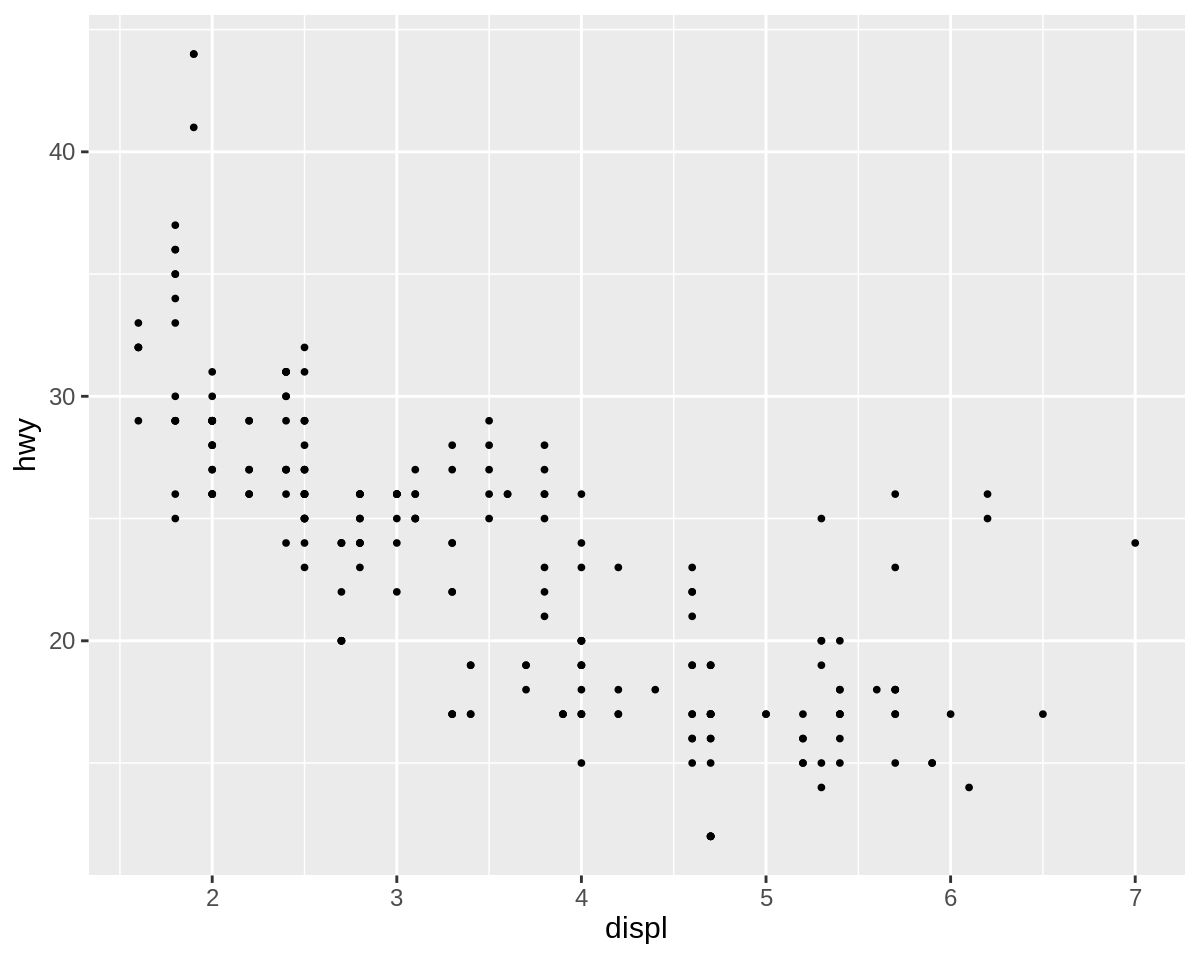

In [4]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

O gráfico mostra uma relação negativa entre tamanho do motor (`displ`) e eficiência de combustível (`hwy`). Em outras palavras, carros com motores grandes usam mais combustível. Isso confirma ou refuta sua hipótese sobre eficiência de combustível e tamanho do motor?

Com **ggplot2**, você inicia um gráfico com a função `ggplot()`. A função `ggplot()` cria um sistema de coordenadas ao qual você pode adicionar camadas. O primeiro argumento de `ggplot()`é o conjunto de dados a ser usado no gráfico. Então `ggplot(data = mpg)` cria um gráfico vazio, mas não é muito interessante então não vou mostrar aqui.

Você completa seu gráfico adicionando uma ou mais camadas ao arquivo `ggplot()`. A função `geom_point()`**adiciona uma camada de pontos ao seu gráfico**, o que cria um gráfico de dispersão. O **ggplot2** vem com muitas **funções** geom que adicionam um tipo diferente de camada a um gráfico. Você aprenderá um monte deles ao longo deste capítulo.

Cada **função geom** no **ggplot2** recebe um **argumento mapping**. Isso define como as variáveis em seu conjunto de dados são mapeadas para propriedades visuais. O mappingargumento é sempre emparelhado com **aes()**, e os argumentos x e Y  especificam quais variáveis mapear para os eixos x e y. ggplot2 procura as variáveis mapeadas no argumento, neste caso, `mpg`.

### 3.2.3 Um TEMPLATE gráfico
Vamos transformar este código em um modelo reutilizável para fazer gráficos com **ggplot2**. Para fazer um gráfico, substitua as seções entre colchetes no código abaixo por um conjunto de dados, uma **função geom** ou uma coleção de mapeamentos.
```
ggplot(data = <DATA>) + 
  <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```
O restante deste capítulo mostrará como completar e estender este modelo para fazer diferentes tipos de gráficos. Vamos começar com o componente `<MAPPINGS>`.

### 3.2.4 Exercícios
1. Executar ggplot(data = mpg). O que você vê?

2. Quantas linhas estão em mpg? Quantas colunas?

3. O que a drvvariável descreve? Leia a ajuda para ?mpgdescobrir.

4. Faça um gráfico de dispersão de hwy vs.cyl

5. O que acontece se você fizer um gráfico de dispersão de classvs drv? Por que este gráfico não é útil?

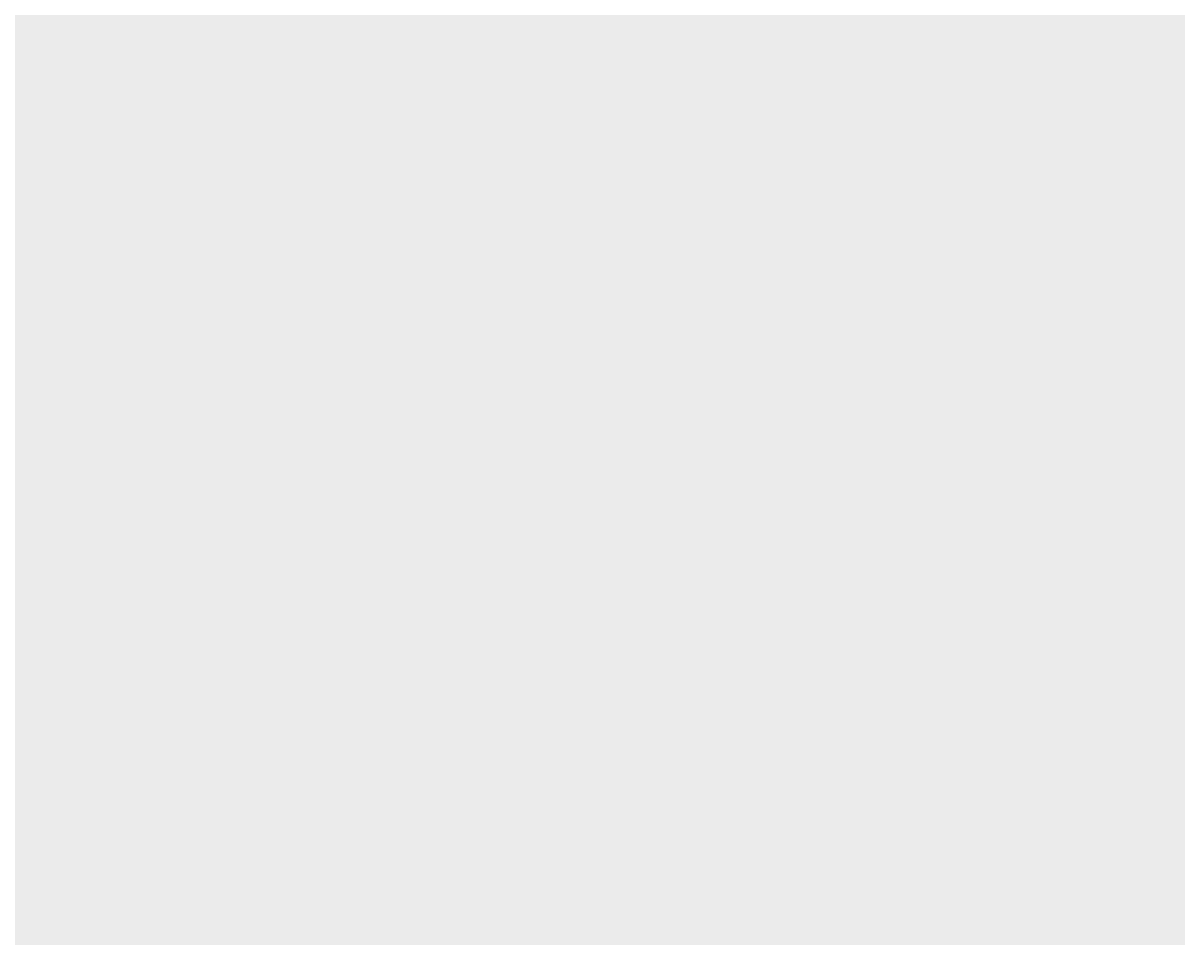

In [5]:
# 1. Executar ggplot(data = mpg). O que você vê?
ggplot(data = mpg)

In [6]:
# 2. Quantas linhas estão em mpg? Quantas colunas?
mpg
# Resp: 234 linhas e 11 colunas

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [7]:
# 3. O que a variável drv descreve? Leia a ajuda para ?mpgdescobrir.
?mpg

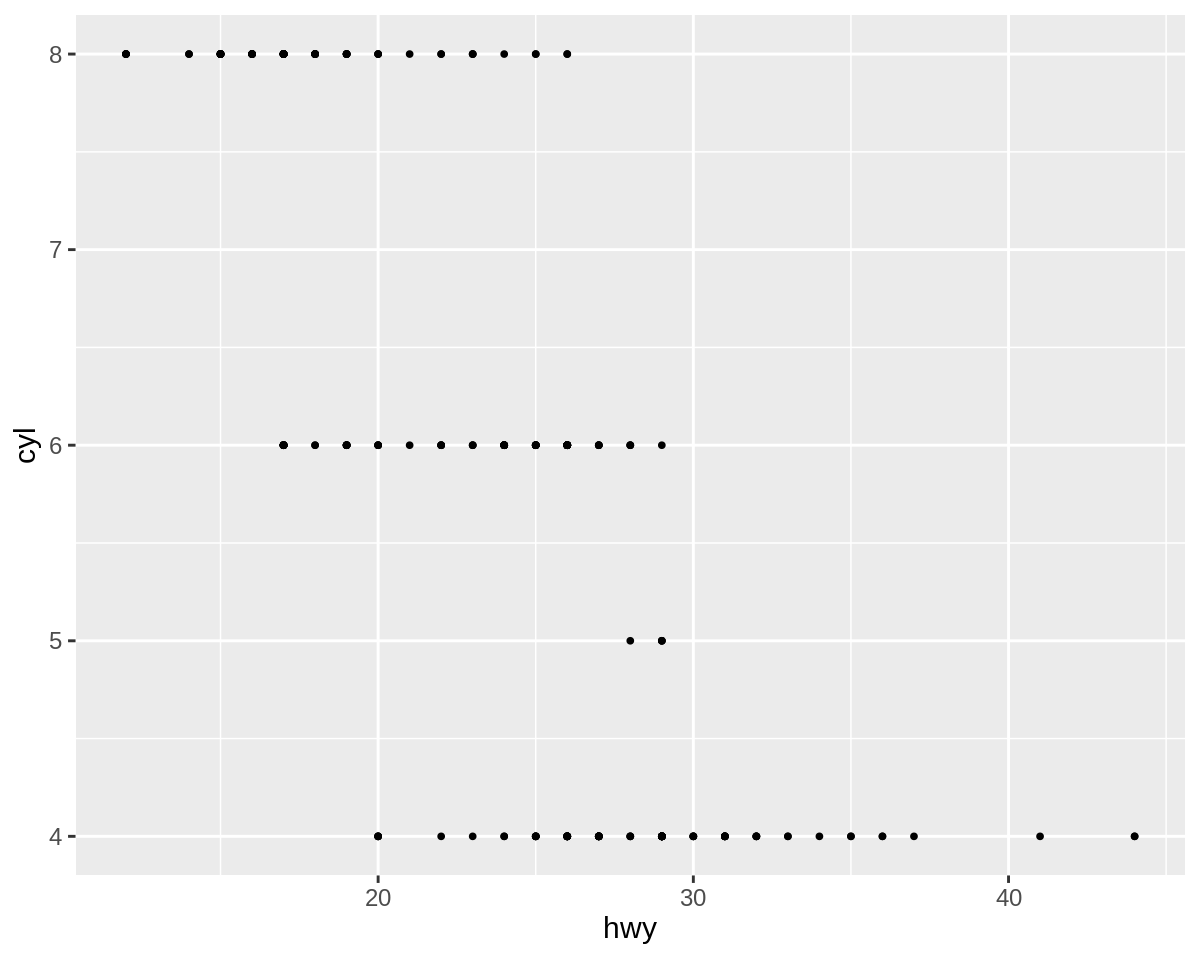

In [8]:
# 4. Faça um gráfico de dispersão de hwy vs.cyl
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = hwy, y = cyl))

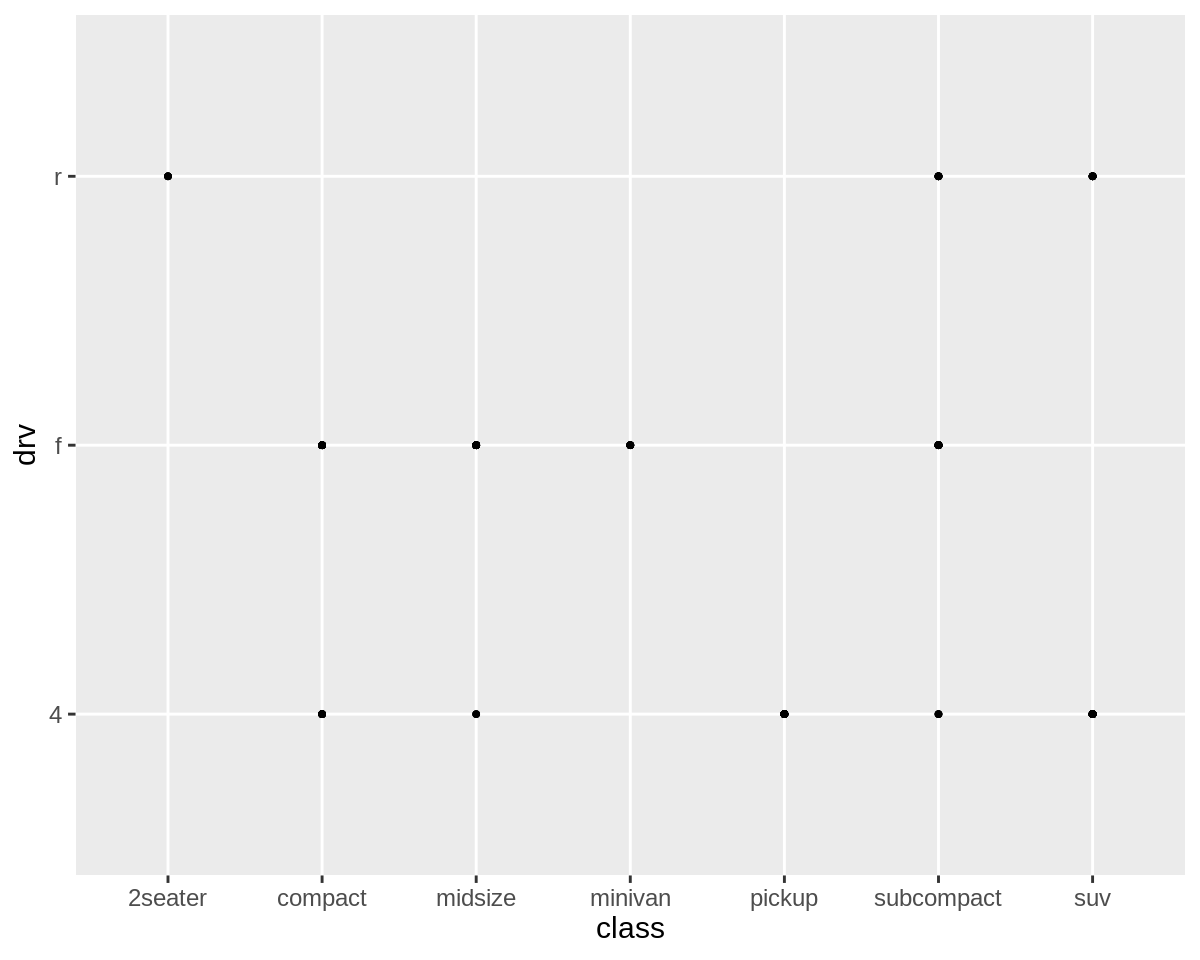

In [9]:
# 5. O que acontece se você fizer um gráfico de dispersão de classvs drv? Por que este gráfico não é útil?
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = class, y = drv))
# Resp.: Não há uma relação entre as varíaveis class e drv

## 3.3 Mapeamentos estéticos
> “O maior valor de uma imagem é quando ela nos obriga a perceber o que nunca esperávamos ver.” — John Tukey

No gráfico abaixo, um grupo de pontos (destacado em vermelho) parece estar fora da tendência linear. Esses carros têm uma quilometragem maior do que você poderia esperar. Como você pode explicar esses carros?
<img src="https://d33wubrfki0l68.cloudfront.net/a4611ecfa41fe0b4c048b52e942ac38c0e16ff76/e87e4/visualize_files/figure-html/unnamed-chunk-5-1.png" width="400">

Vamos supor que os carros são híbridos. Uma maneira de testar essa hipótese é observar o valor `class` de cada carro. A variável `class`do conjunto de dados mpg classifica os carros em grupos como compacto, médio e SUV. Se os pontos periféricos são híbridos, eles devem ser classificados como carros compactos ou, talvez, carros subcompactos (lembre-se de que esses dados foram coletados antes de caminhões e SUVs híbridos se tornarem populares).

Você pode adicionar uma terceira variável, como class, a um gráfico de dispersão bidimensional mapeando-a para uma estética . 

Uma estética é uma propriedade visual dos objetos em seu gráfico. A estética inclui coisas como o tamanho, a forma ou a cor dos seus pontos. 

Você pode exibir um ponto (como o abaixo) de diferentes maneiras alterando os valores de suas propriedades estéticas. Como já usamos a palavra “valor” para descrever dados, vamos usar a palavra “nível” para descrever propriedades estéticas. Aqui alteramos os níveis de tamanho, forma e cor de um ponto para torná-lo pequeno, triangular ou azul:

<img src="https://d33wubrfki0l68.cloudfront.net/e2ebb6c8b73ed7f4a931b18dd6ce1a3165bf22e6/0c5bc/visualize_files/figure-html/unnamed-chunk-6-1.png" width="200">

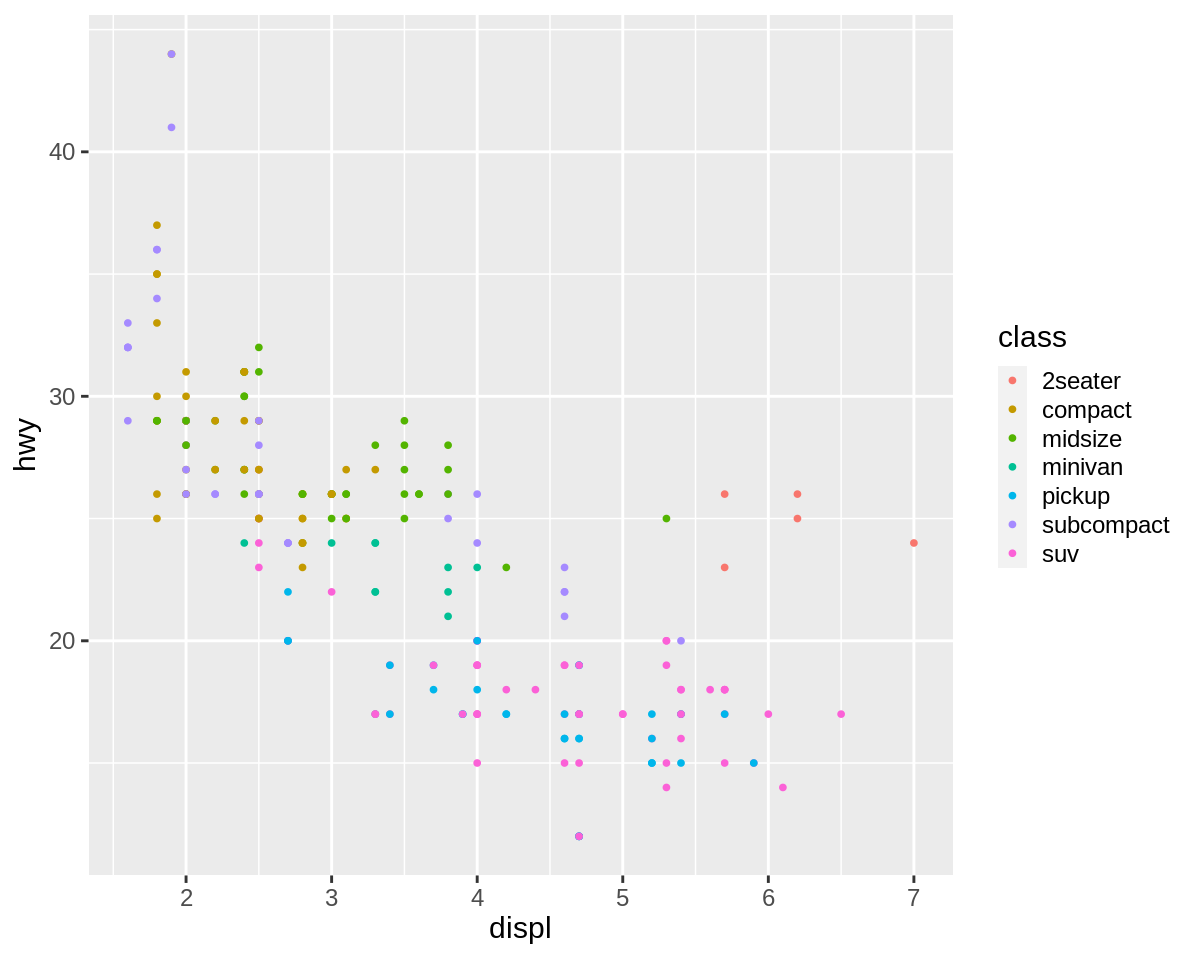

In [10]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

Se você preferir o inglês britânico, como Hadley, você pode usar `colour`em vez de `color`.)

Para mapear uma estética para uma variável, associe o nome da estética ao nome da variável dentro de `aes()`. O **ggplot2** atribuirá automaticamente um nível único da estética (aqui uma cor única) para cada valor único da variável, um processo conhecido como dimensionamento . O **ggplot2** também adicionará uma legenda que explica quais níveis correspondem a quais valores.

As cores revelam que muitos dos pontos inusitados são carros de dois lugares. Esses carros não parecem híbridos e são, na verdade, carros esportivos! Os carros esportivos têm motores grandes, como SUVs e picapes, mas corpos pequenos, como carros médios e compactos, o que melhora seu consumo de combustível. Em retrospectiva, era improvável que esses carros fossem híbridos, pois têm motores grandes.

No exemplo acima, mapeamos `class`para a estética de `color`, mas poderíamos ter mapeado `class`para a estética `size` da mesma maneira. 
Nesse caso, o tamanho exato de cada ponto revelaria sua afiliação de classe. Recebemos um aviso aqui, porque mapear uma variável não ordenada (`class`) para uma estética ordenada (`size`) não é uma boa ideia.

Warning message:
“Using size for a discrete variable is not advised.”


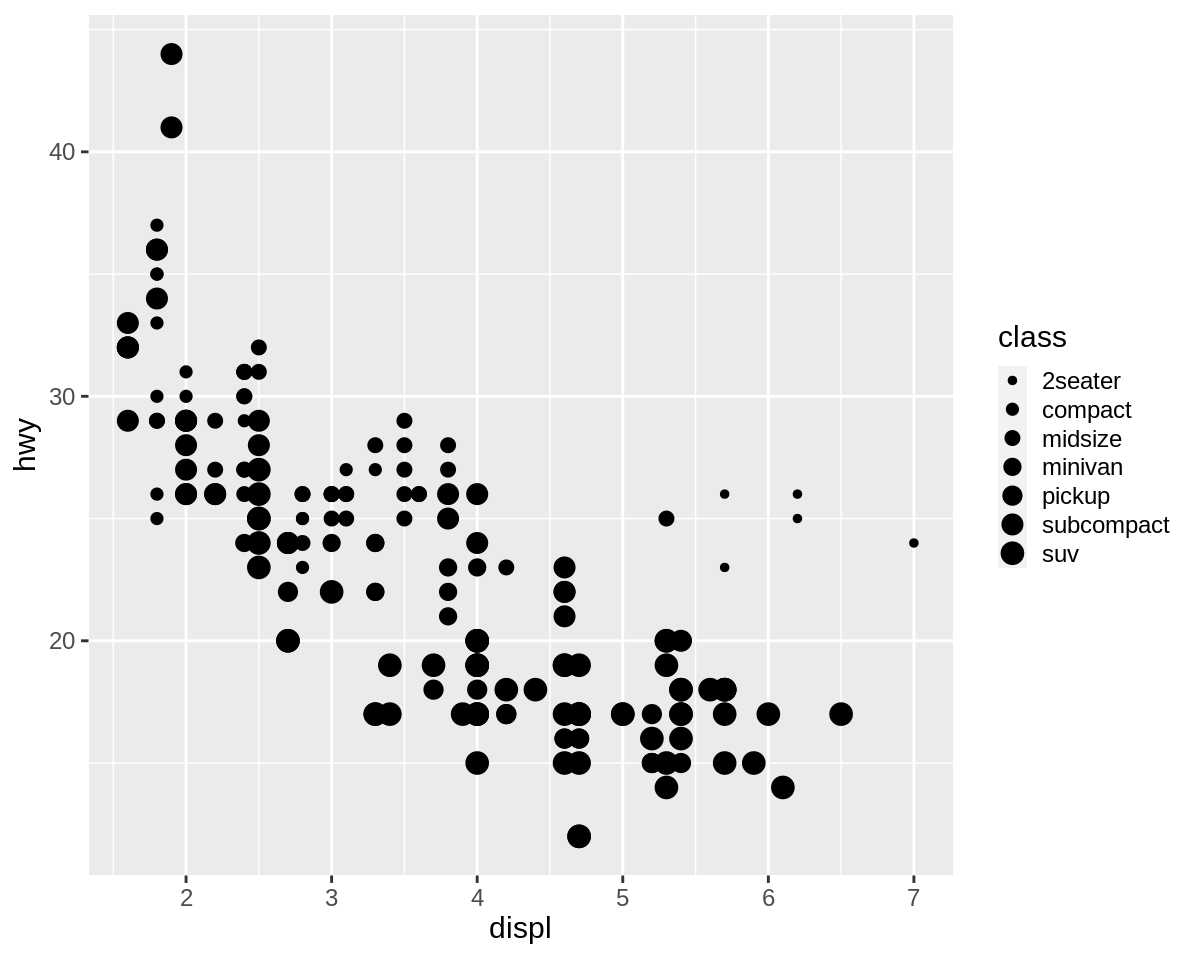

In [11]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))

Ou poderíamos ter mapeado `class`para a estética `alfa` , que controla a transparência dos pontos, ou para a estética da `shape`, que controla a forma dos pontos.

Warning message:
“Using alpha for a discrete variable is not advised.”
Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”
Warning message:
“Removed 62 rows containing missing values (geom_point).”


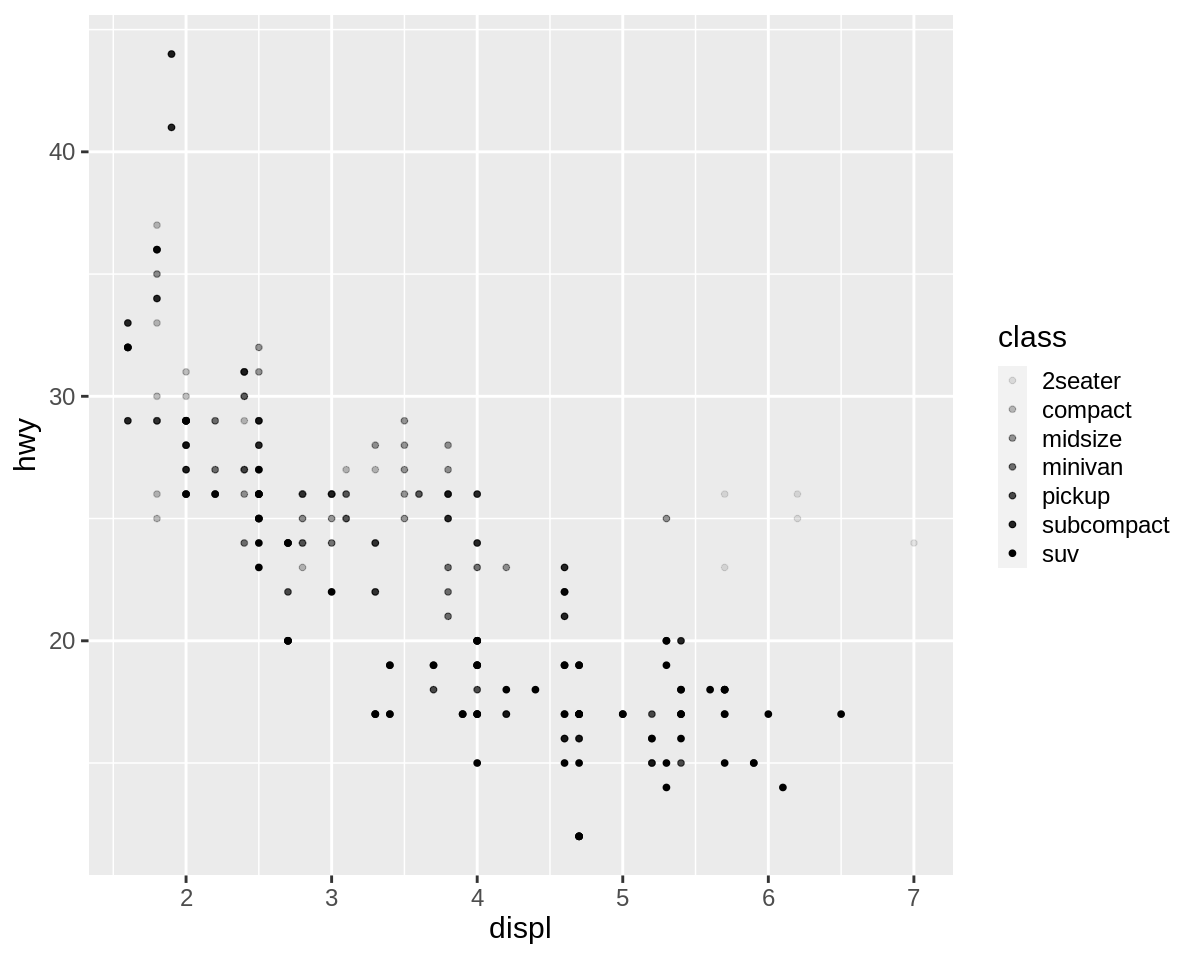

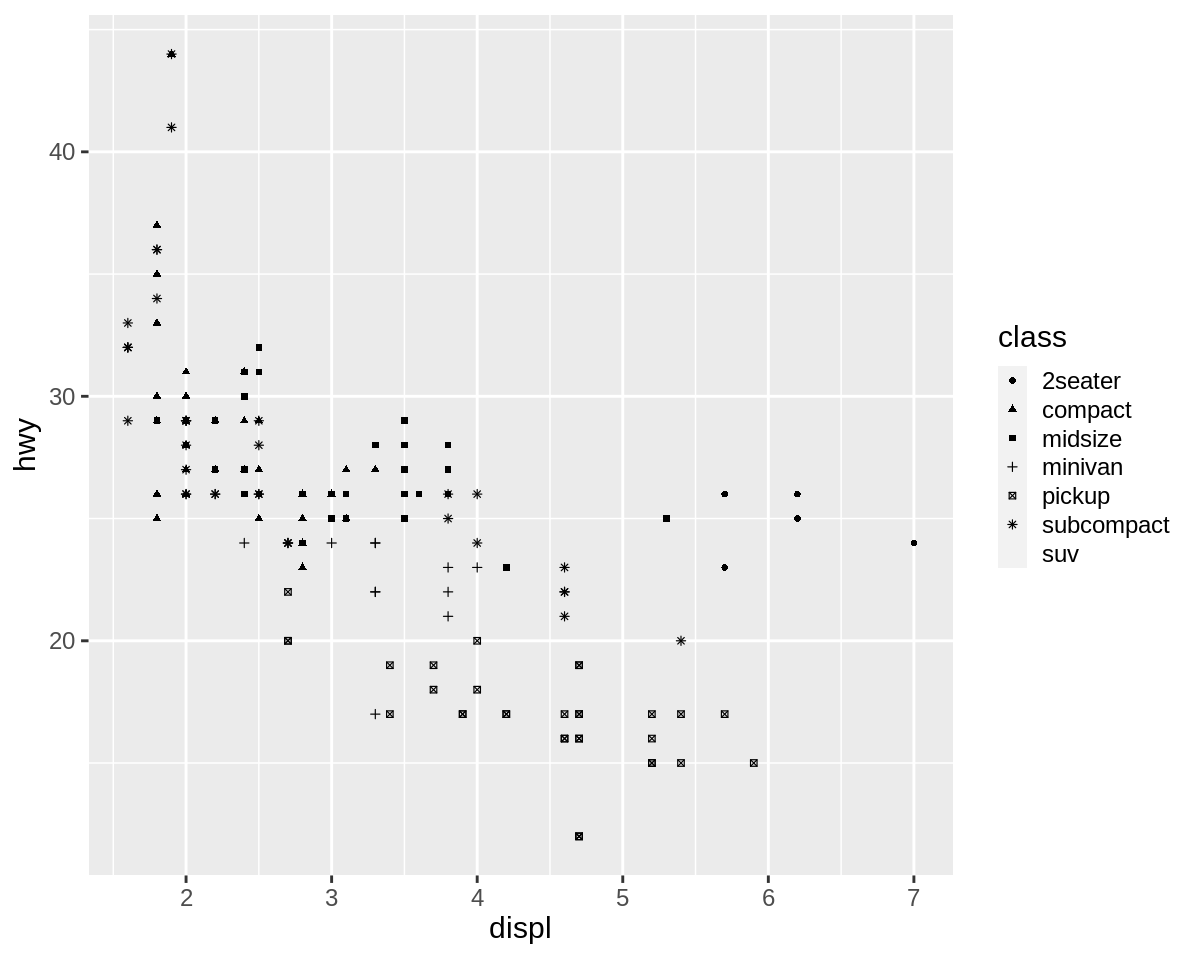

In [13]:
# superior
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

# inferior
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

O que aconteceu com os SUVs? **ggplot2** usará apenas seis formas por vez. Por padrão, grupos adicionais não serão plotados quando você usar a estética de forma.

Para cada estética, você associa o nome da estética a uma variável a ser exibida. A função reúne `aes()` cada um dos mapeamentos estéticos usados por uma camada e os passa para o argumento de mapeamento da camada. A sintaxe destaca uma visão útil sobre xe y: as localizações x e y de um ponto são estéticas, propriedades visuais que você pode mapear para variáveis para exibir informações sobre os dados.

Depois de mapear uma estética, o **ggplot2** cuida do resto. Seleciona uma escala razoável para usar com a estética e constrói uma legenda que explica o mapeamento entre níveis e valores. Para estética x e y, o **ggplot2** não cria uma legenda, mas cria uma linha de eixo com marcas de escala e um rótulo. A linha do eixo funciona como uma legenda; ele explica o mapeamento entre locais e valores.

Você também pode definir as propriedades estéticas do seu geom manualmente. Por exemplo, podemos fazer com que todos os pontos em nosso gráfico sejam azuis:

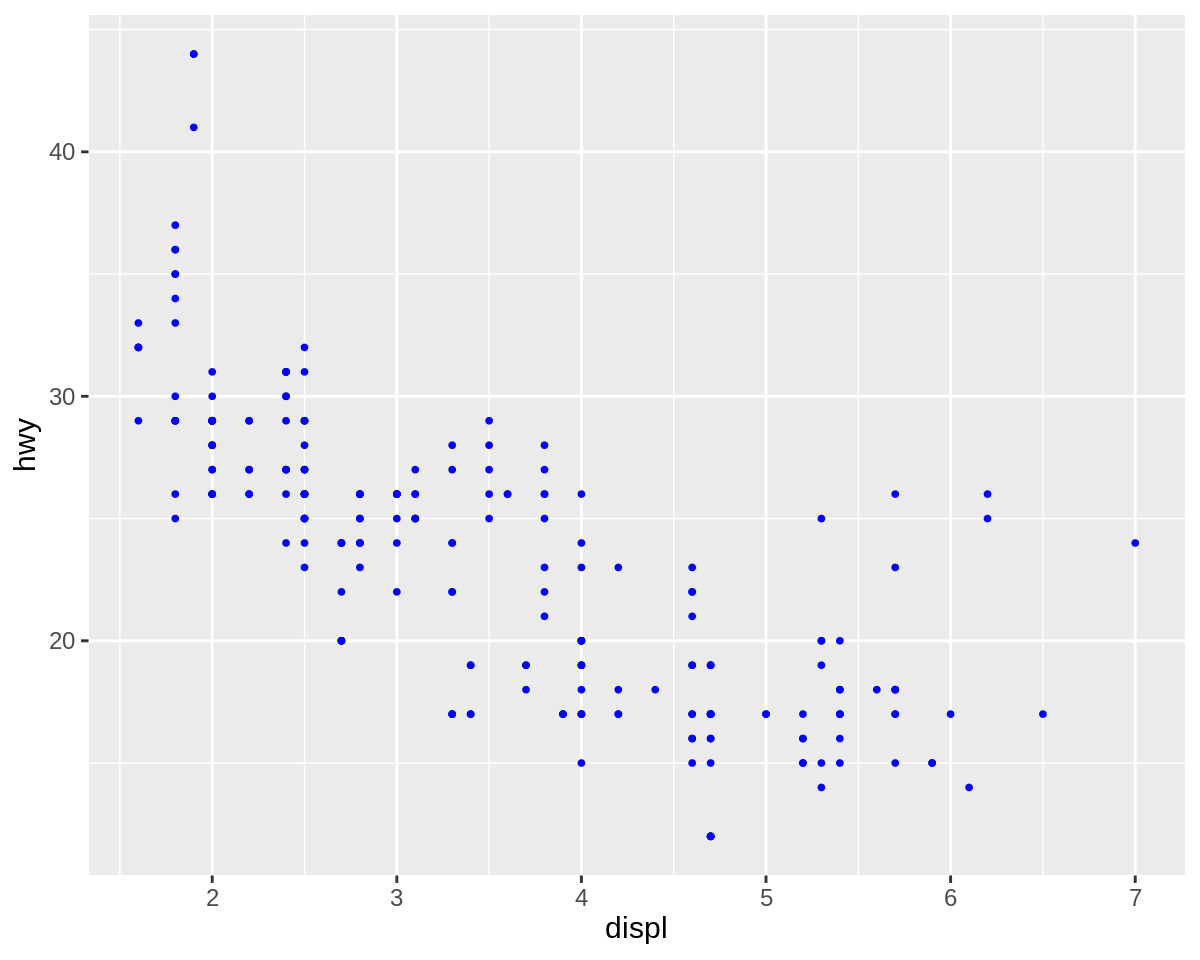

In [14]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

Aqui, a cor não transmite informações sobre uma variável, mas apenas altera a aparência do gráfico. Para definir uma estética manualmente, defina a estética pelo nome como um argumento da sua **função geom**; ou seja, ele vai para fora da **função aes()** . Você precisará escolher um nível que faça sentido para essa estética:

- O nome de uma cor como uma cadeia de caracteres.

- O tamanho de um ponto em mm.

- A forma de um ponto como um número, conforme mostrado na Figura 3.1 .

<img src="https://d33wubrfki0l68.cloudfront.net/e28a1b57b6622cf67fd8a7e01c6a9955914f8fe9/635be/visualize_files/figure-html/shapes-1.png" width="500">

**Figura 3.1**: R tem 25 formas embutidas que são identificadas por números. Existem algumas duplicatas aparentes: por exemplo, 0, 15 e 22 são todos quadrados. A diferença vem da interação das estéticas `colour` e `fill`. As formas ocas (0–14) têm uma borda determinada por `colour`; as formas sólidas (15–20) são preenchidas com `colour`; as formas preenchidas (21–24) têm uma borda de `colour`e são preenchidas com `fill`.

### 3.3.1 Exercícios
O que há de errado com este código? Por que os pontos não são azuis?

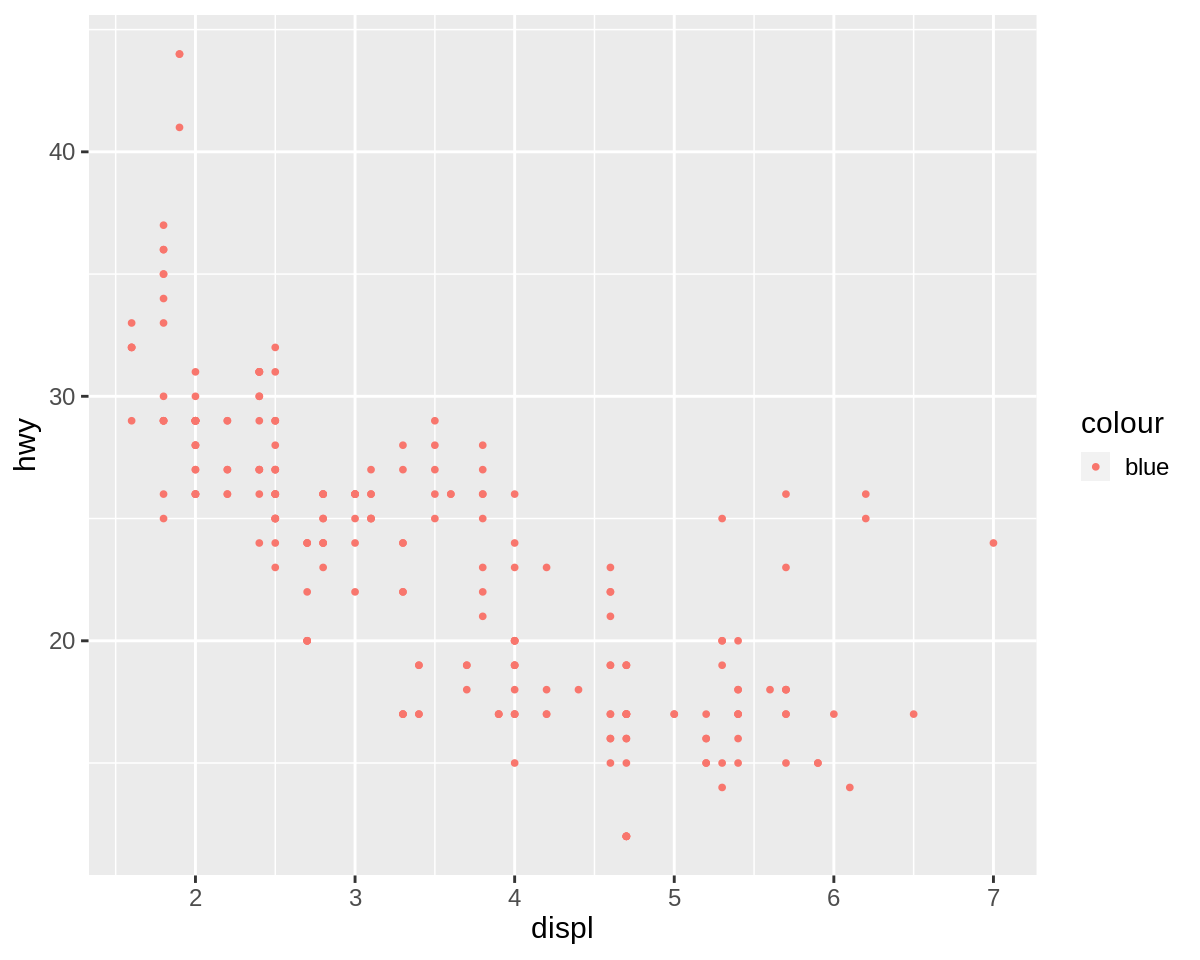

In [15]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

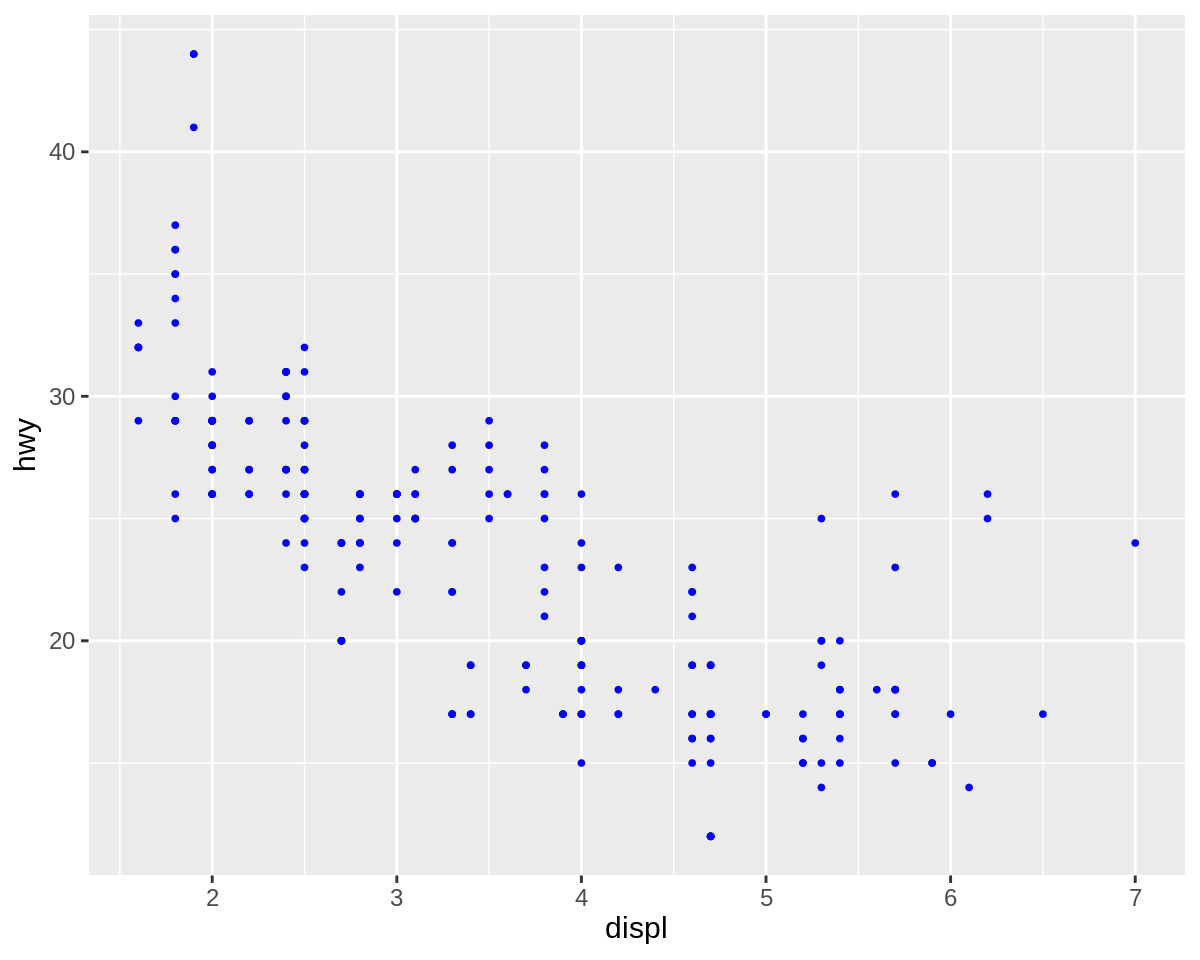

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

Quais variáveis em mpgsão categóricas? Quais variáveis são contínuas? (Dica: digite ?mpg para ler a documentação do conjunto de dados). Como você pode ver essas informações ao executar mpg?

In [17]:
mpg
# Categoricas:
# manufacturer, model, trans, drv, fi, class
# Continuas:
# displ, year, cyl, hwy

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


Mapeie uma variável contínua para color, size, e shape. Como essas estéticas se comportam de maneira diferente para variáveis categóricas versus variáveis contínuas?

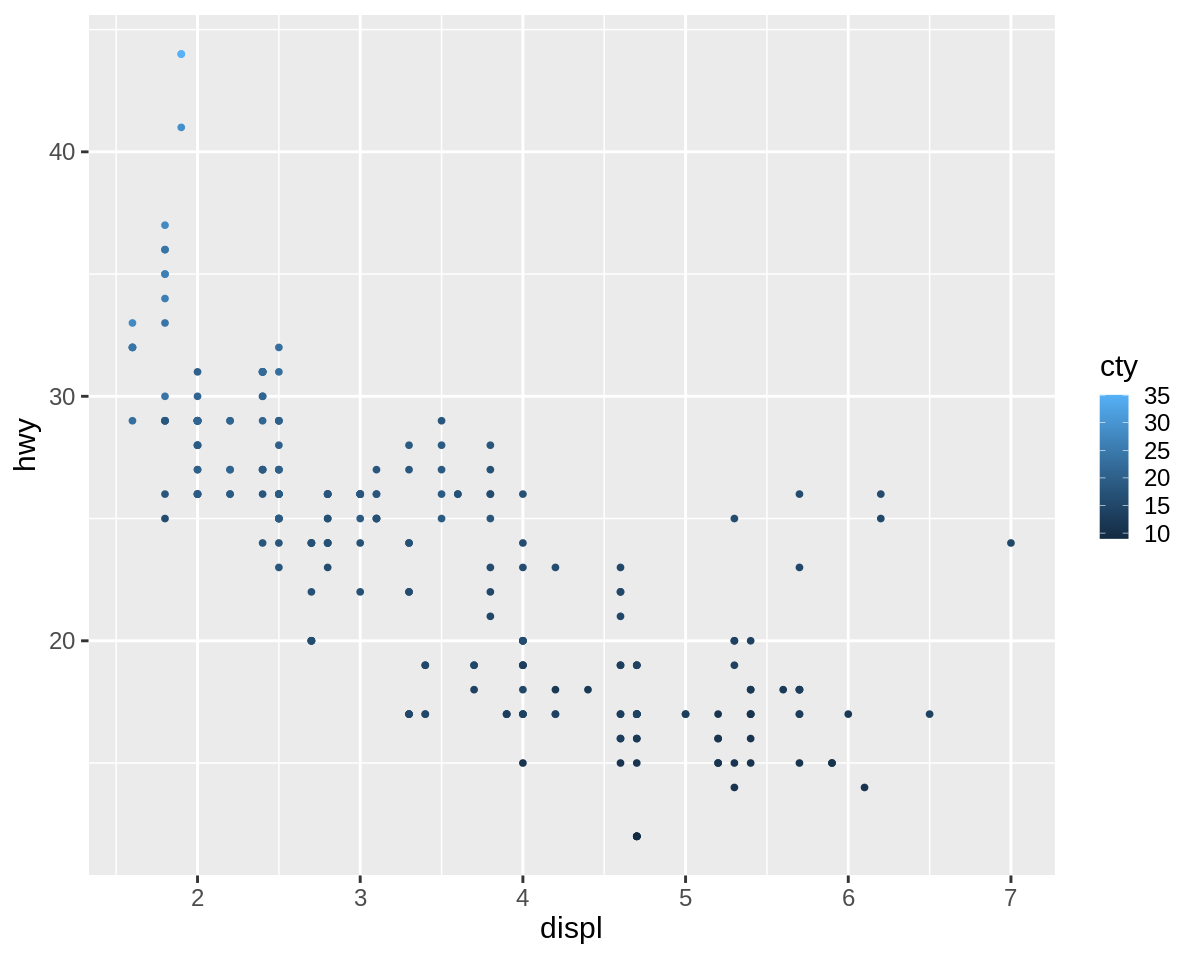

In [18]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = cty))

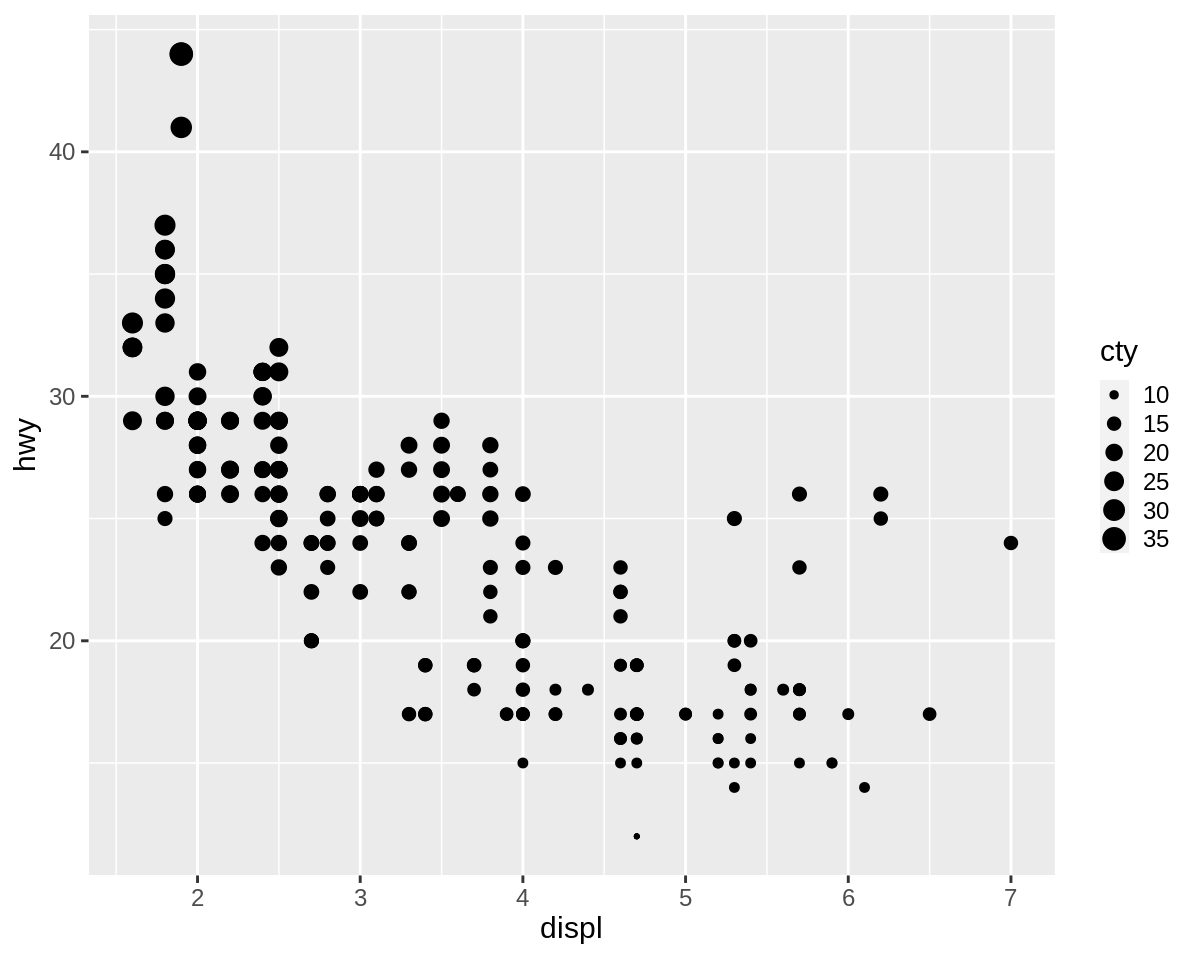

In [19]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = cty))

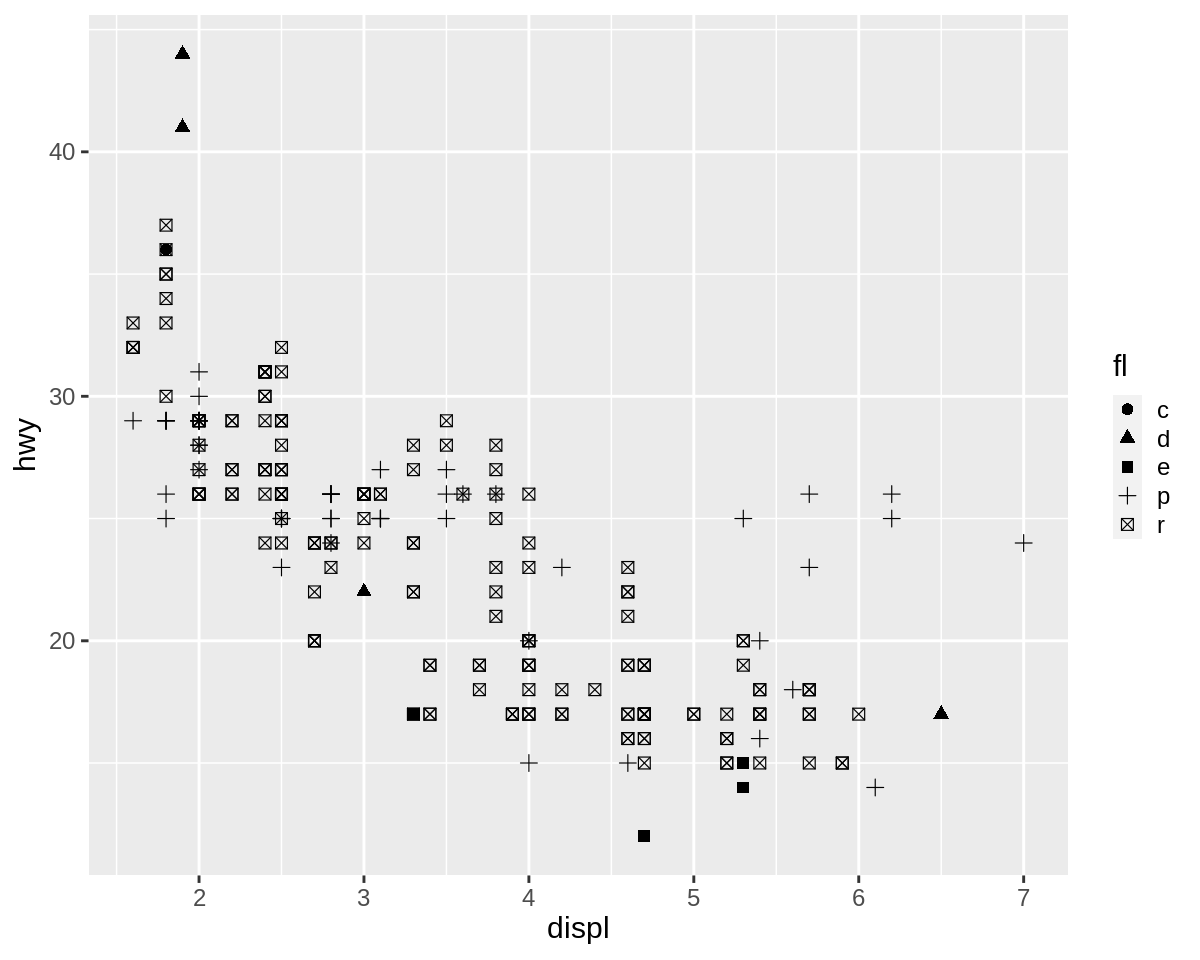

In [20]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = fl), size=3)

O que acontece se você mapear a mesma variável para múltiplas estéticas?

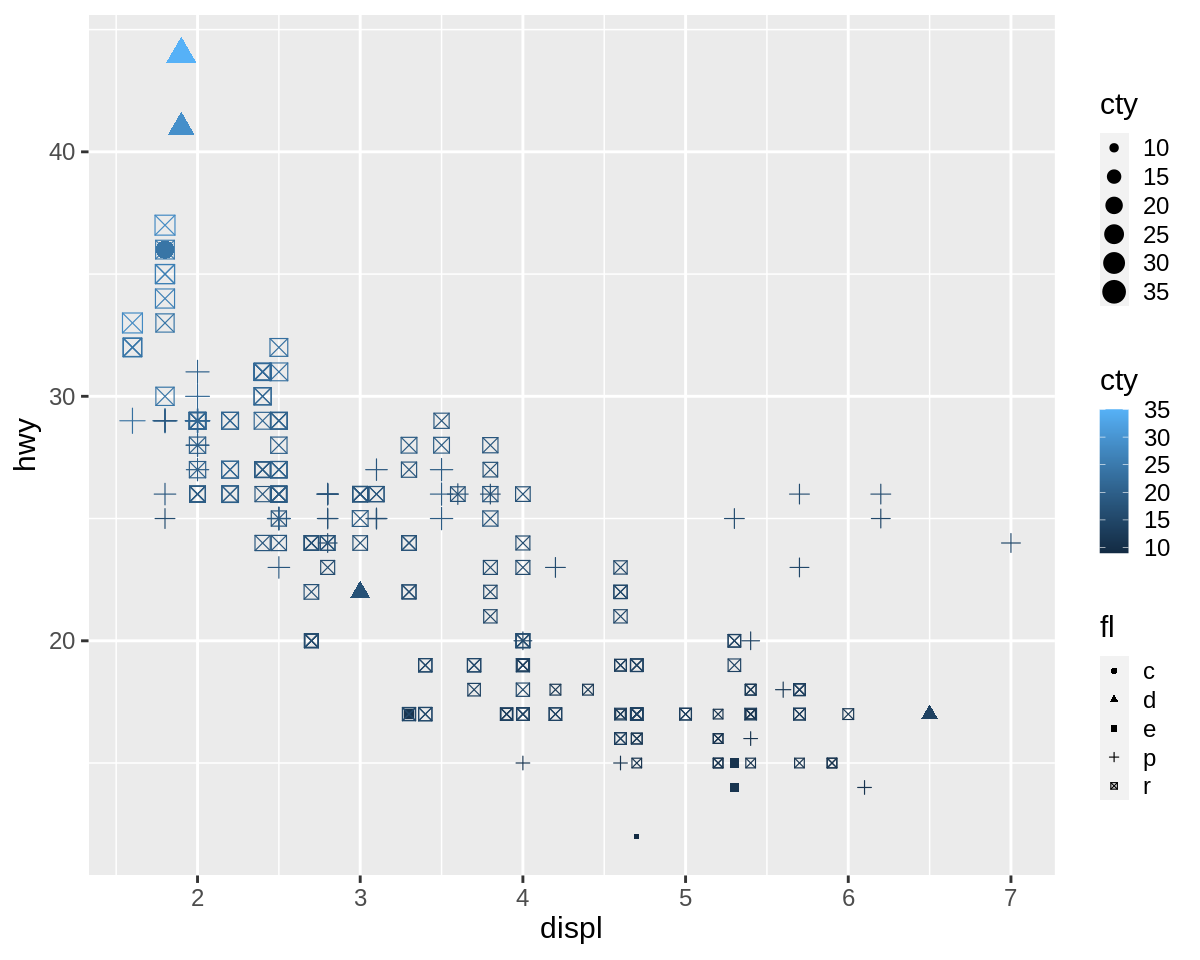

In [21]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = cty, color=cty, shape = fl))

O que a strokeestética faz? Com que formas funciona? (Dica: use ?geom_point)

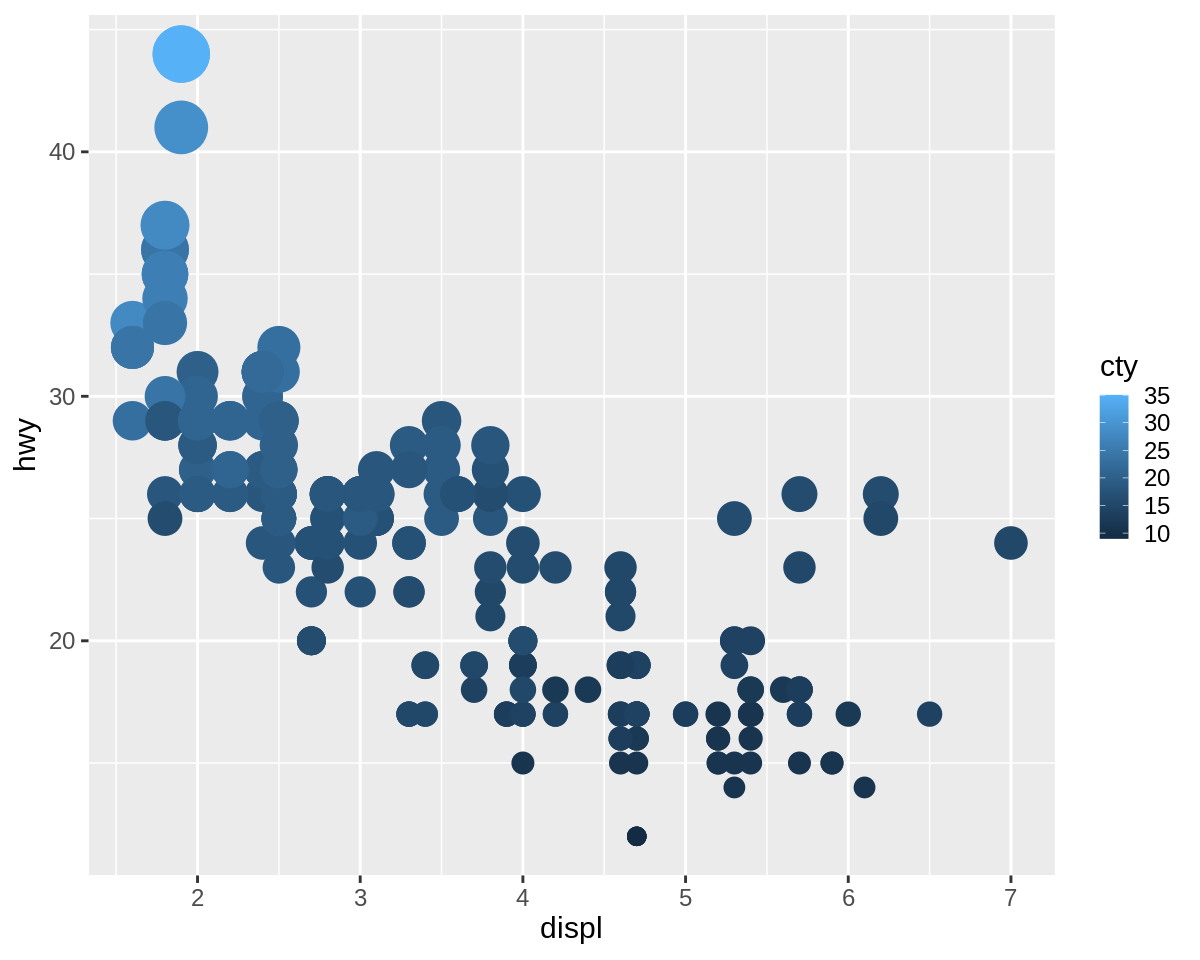

In [22]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, stroke = hwy/4, color=cty))

O que acontece se você mapear uma estética para algo diferente de um nome de variável, como aes(colour = displ < 5)? Observe que você também precisará especificar x e y.

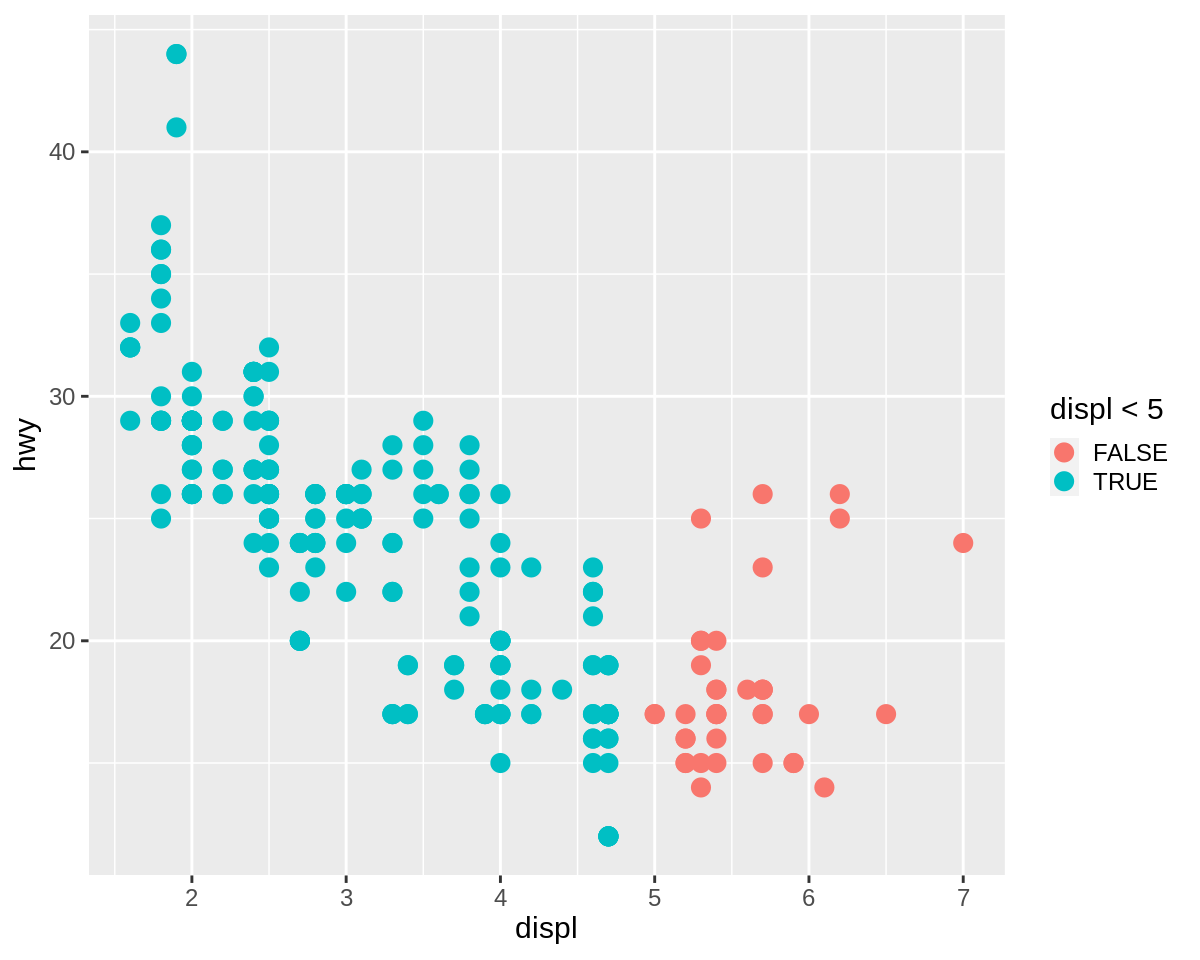

In [23]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, colour = displ < 5), size=5)

## 3.5 Facetas
Uma maneira de adicionar variáveis adicionais é com a estética. Outra maneira, particularmente útil para variáveis categóricas, é dividir seu gráfico em facetas , subtramas em que cada uma exibe um subconjunto dos dados.

Para facetar seu gráfico por uma única variável, use `facet_wrap()`. O primeiro argumento de `facet_wrap()` deve ser uma fórmula, com a qual você cria ~seguido por um nome de variável (aqui “fórmula” é o nome de uma estrutura de dados em R, não um sinônimo de “equação”). A variável para a qual você passa `facet_wrap()`deve ser discreta.

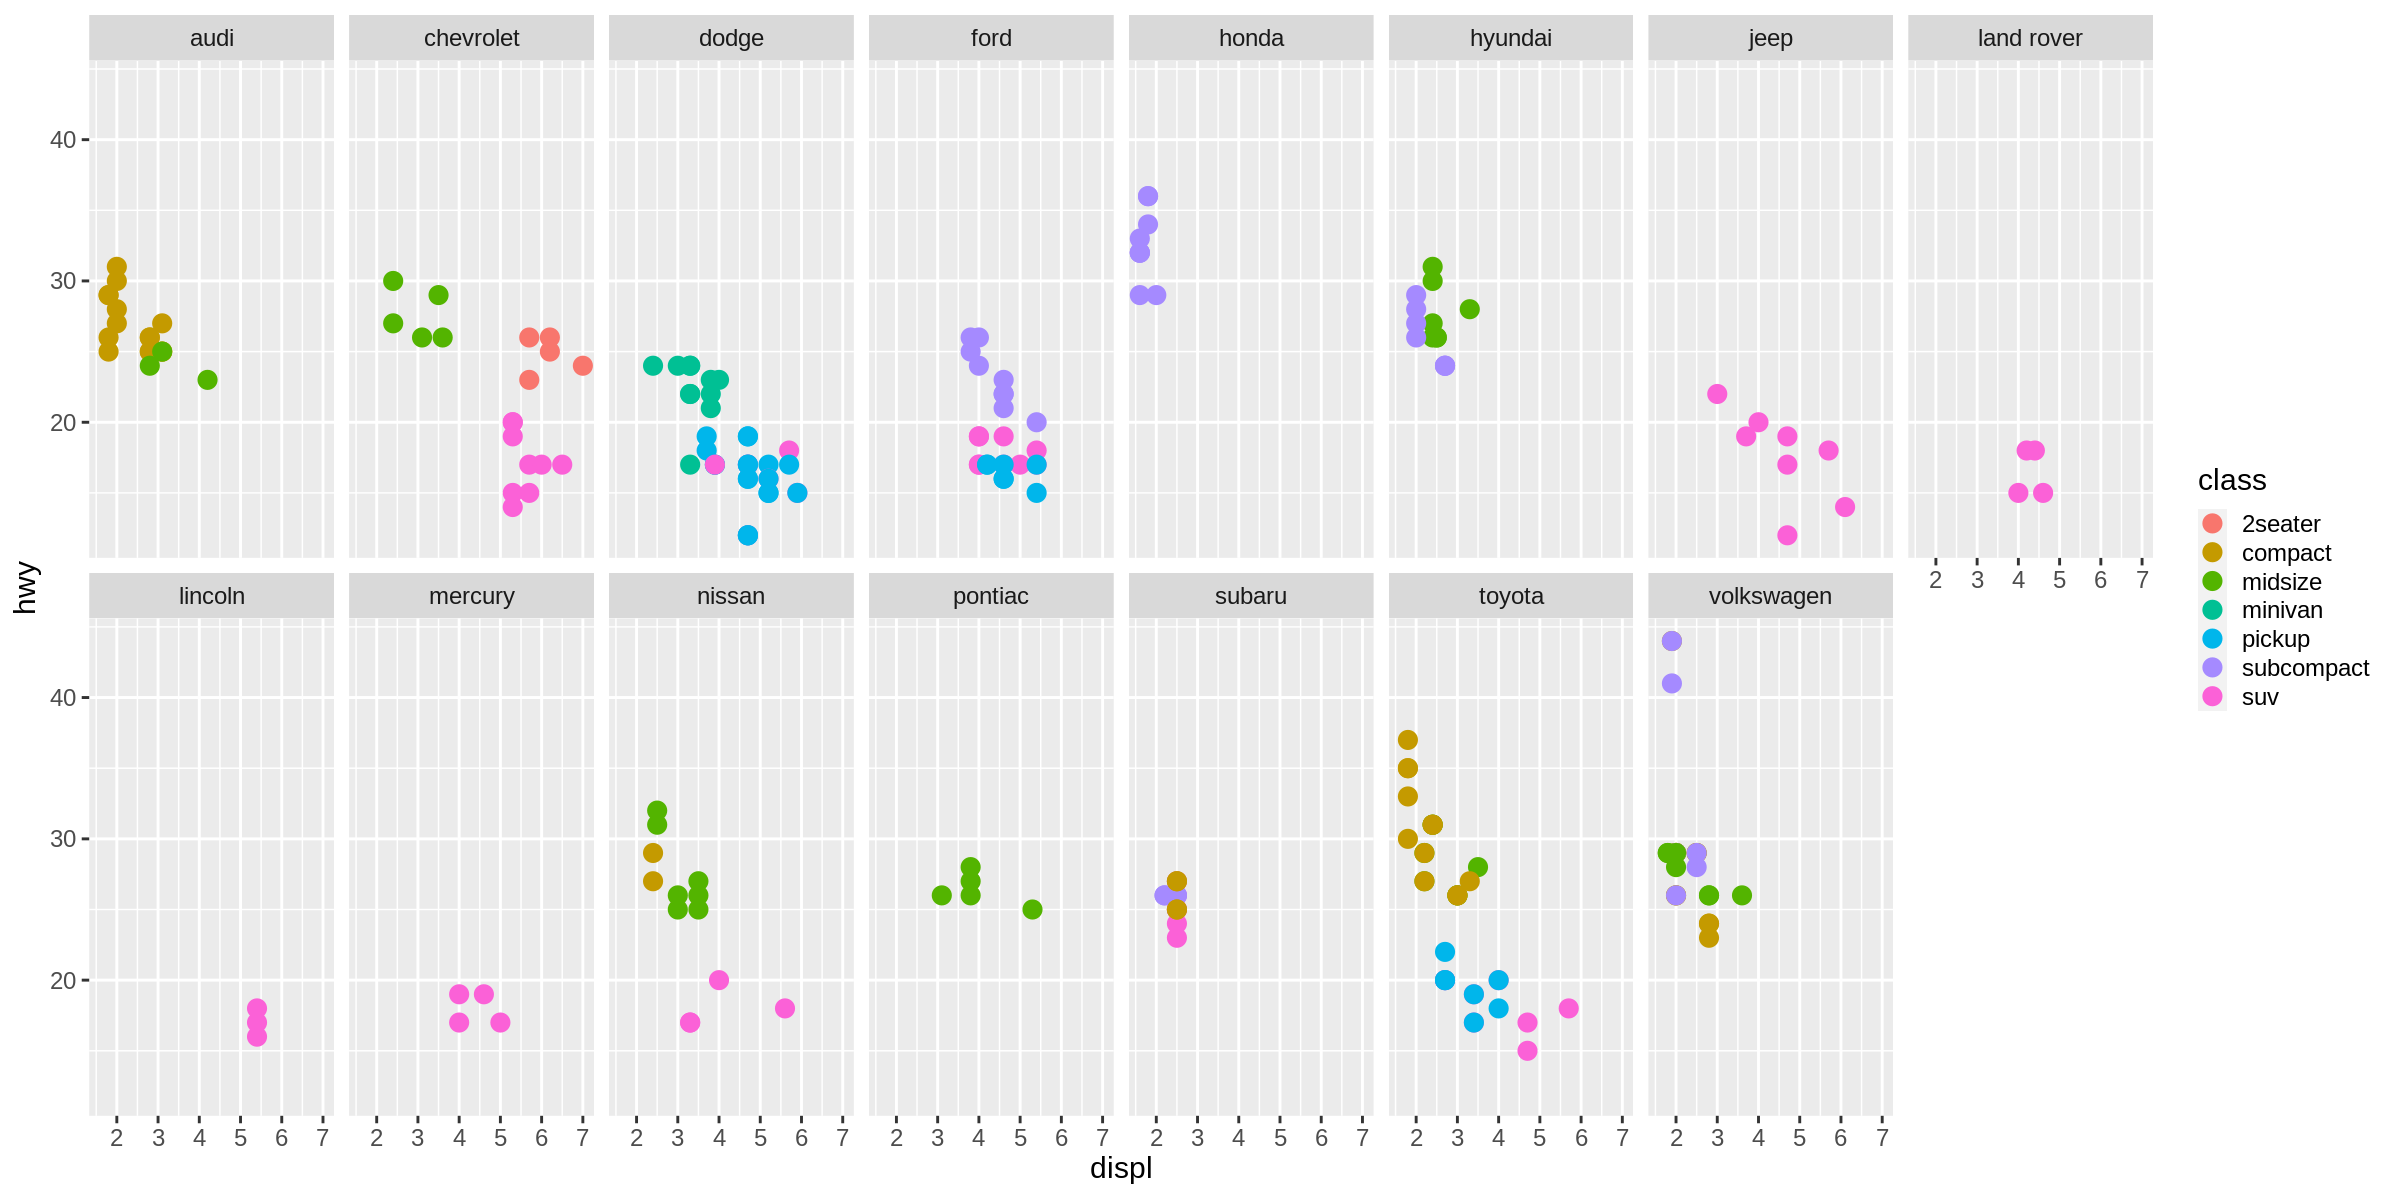

In [24]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color=class), size=5) + 
  facet_wrap(~ manufacturer, nrow = 2)

Para transformar seu gráfico na combinação de duas variáveis, adicione `facet_grid()`à sua chamada de gráfico. O primeiro argumento de `facet_grid()`também é uma fórmula. Desta vez, a fórmula deve conter dois nomes de variáveis separados por um `~`.